# FAI Homework 6

**FBA Quant 이의형**

---

## Problem 1. Mean Variance Optimization

---

**(a)** Create 3 portfolios (mean variance optimized, equal-weight, value-weight) using 30 stocks daily close price data.  
Rebalance every month. Sample period for estimating mean and variance is (2020-2022).  
Assume shorting is possible. Report and compare the performance of portfolios.  
(annualized mean return, annualized return standard deviation, Sharpe ratio, and maximum drawdown)

### Data

In [1]:
import json
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

# KRX 차단으로 개인 DB 이용
class DBmgr:
    def __init__(self):
        with open('db_info.json', 'r') as json_file:
            db_info = json.load(json_file)
        self.conn = pymysql.connect(**db_info)
    
    def get_stock_data(self, table, code=None, start_date='0', end_date='3000_00_00', only_stock=False, only_ohlcv=False):
        """Return stock data in table"""
        start_date = int(re.sub(r'[^0-9]', '', start_date))
        end_date = int(re.sub(r'[^0-9]', '', end_date))
        
        stock_cond = "(sh7code LIKE 'A%') AND" if only_stock else ''
        ohlcv_cond = 'dateint, sh7code, open, high, low, close, vol' if only_ohlcv else '*'
        
        if code == None:
            sql = f"""
            SELECT {ohlcv_cond} FROM {table}
            WHERE {stock_cond} dateint BETWEEN '{start_date}' AND '{end_date}'
            """
        else:
            sh7code = f"'{code}'" if isinstance(code, str) else str(code)[1:-1]
            sql = f"""
            SELECT {ohlcv_cond} FROM {table} 
            WHERE {stock_cond} (sh7code IN ({sh7code})) AND (dateint BETWEEN '{start_date}' AND '{end_date}')
            """
        df = pd.read_sql(sql, self.conn)
        return df

In [2]:
dbm = DBmgr()

# 2020년부터 데이터가 전부 존재하는 전종목 시가총액 추출
all_stock_data = dbm.get_stock_data(table='daily_price', start_date='2020-01-01', end_date='2023-10-04', only_stock=True)
mc = pd.pivot_table(data=all_stock_data, values='mc', index='dateint', columns='sh7code')
mc.dropna(axis=1, inplace=True)
mc.index = pd.to_datetime(mc.index.astype(str))
mc.index.name = 'date'
mc

sh7code,A000020,A000040,A000050,A000070,A000075,A000080,A000087,A000100,A000105,A000120,...,A900280,A900290,A900300,A900310,A900340,A950110,A950130,A950140,A950160,A950170
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,2.346200e+11,5.342600e+10,2.626350e+11,5.763570e+11,1.308700e+10,2.026843e+12,1.954900e+10,2.957870e+12,4.945700e+10,3.478830e+12,...,5.096800e+10,1.613770e+11,7.969500e+10,1.047600e+11,9.525500e+10,2.502580e+11,7.118300e+10,8.880500e+10,4.895410e+11,3.122440e+11
2020-01-03,2.335030e+11,5.286600e+10,2.629090e+11,5.712180e+11,1.308700e+10,2.002297e+12,1.943600e+10,2.945108e+12,4.933800e+10,3.376176e+12,...,5.382600e+10,1.717990e+11,7.827100e+10,1.044900e+11,9.352300e+10,2.458200e+11,7.151900e+10,9.327500e+10,4.895410e+11,3.118940e+11
2020-01-06,2.284750e+11,5.170000e+10,2.615390e+11,5.498080e+11,1.311700e+10,2.009310e+12,1.949200e+10,2.893988e+12,4.839500e+10,3.353364e+12,...,5.255600e+10,1.751740e+11,7.400200e+10,1.026000e+11,9.135800e+10,2.403960e+11,6.967200e+10,9.337400e+10,4.895410e+11,2.992920e+11
2020-01-07,2.279160e+11,5.020700e+10,2.620870e+11,5.558030e+11,1.305600e+10,1.995283e+12,1.943600e+10,2.945108e+12,4.874800e+10,3.353364e+12,...,5.287300e+10,1.764980e+11,7.684800e+10,1.088100e+11,9.330700e+10,2.465600e+11,6.984000e+10,9.397000e+10,4.895410e+11,2.971920e+11
2020-01-08,2.214920e+11,4.946000e+10,2.541370e+11,5.283980e+11,1.278300e+10,1.942684e+12,1.909700e+10,2.887644e+12,4.827600e+10,3.273522e+12,...,4.985600e+10,1.684250e+11,7.087100e+10,1.036800e+11,8.746100e+10,2.399020e+11,6.581000e+10,9.208300e+10,4.895410e+11,2.828400e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-22,2.717680e+11,7.143000e+10,2.390580e+11,5.994800e+11,1.592900e+10,1.354969e+12,1.701700e+10,5.632893e+12,7.351400e+10,1.859178e+12,...,3.183700e+10,2.105460e+11,3.752500e+10,6.871500e+10,4.341500e+10,1.201390e+11,4.430430e+11,2.364170e+11,6.398040e+11,1.893340e+11
2023-09-25,2.686960e+11,6.873800e+10,2.404290e+11,5.977670e+11,1.589900e+10,1.352865e+12,1.695000e+10,5.678875e+12,7.445800e+10,1.820397e+12,...,3.081000e+10,2.216630e+11,3.777000e+10,6.935600e+10,4.307900e+10,1.164110e+11,4.158060e+11,2.435690e+11,6.310790e+11,1.893340e+11
2023-09-26,2.675780e+11,7.027600e+10,2.341240e+11,5.977670e+11,1.583800e+10,1.322708e+12,1.692700e+10,5.694203e+12,7.457600e+10,1.838647e+12,...,2.916700e+10,2.122310e+11,3.703400e+10,6.647400e+10,4.303100e+10,1.184560e+11,4.158060e+11,2.294630e+11,6.296250e+11,1.903400e+11


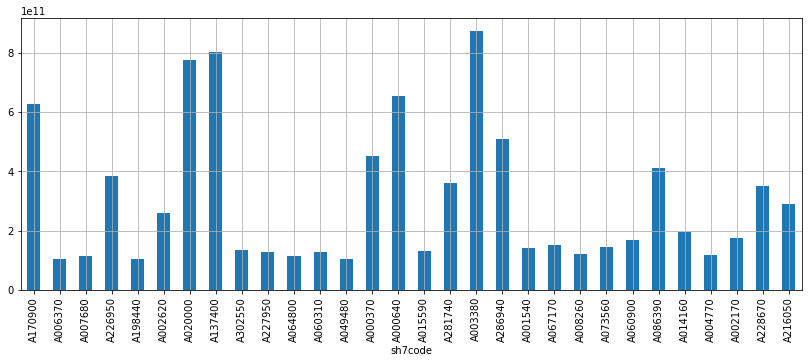

In [3]:
# 과한 비중 부여 방지를 위해 평균 시가총액 1000억 ~ 1조 사이에서만 30 종목 추출
mc_cond_idx = (100_000_000_000 < mc.mean()) & (mc.mean() < 1_000_000_000_000)
mc_cond_idx = mc_cond_idx[mc_cond_idx].index

np.random.seed(31)
rand_idx_30 = np.random.choice(np.arange(mc_cond_idx.shape[0]), 30, replace=False)
target_stock = mc_cond_idx[rand_idx_30]

mc_30 = mc.loc[:,target_stock]
mc_30.mean(axis=0).plot(kind='bar', figsize=(14,5), grid=True);

In [4]:
close = pd.pivot_table(data=all_stock_data, values='close', index='dateint', columns='sh7code')
close_30 = close.loc[:,mc_30.columns]
close_30.index = pd.to_datetime(close_30.index.astype(str))
close_30.index.name = 'date'
close_30

sh7code,A170900,A006370,A007680,A226950,A198440,A002620,A020000,A137400,A302550,A227950,...,A067170,A008260,A073560,A060900,A086390,A014160,A004770,A002170,A228670,A216050
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,113804.0,5930.0,11050.0,21545.0,3100.0,17200.0,31300.0,7380.0,13500.0,1945.0,...,11650.0,2230.0,2030.0,11750.0,14200.0,1125.0,5000.0,60600.0,21450.0,15829.0
2020-01-03,111352.0,5940.0,11100.0,20819.0,3155.0,16900.0,31600.0,7540.0,13500.0,1955.0,...,11800.0,2200.0,2015.0,12000.0,14450.0,1125.0,5660.0,60000.0,21150.0,15798.0
2020-01-06,109390.0,5990.0,10800.0,19593.0,3020.0,16900.0,31300.0,7560.0,13150.0,2020.0,...,11750.0,2110.0,1990.0,12000.0,14450.0,1100.0,5660.0,59100.0,20475.0,15641.0
2020-01-07,109390.0,6050.0,10750.0,19643.0,3060.0,16850.0,31850.0,7450.0,13200.0,1900.0,...,11800.0,2125.0,2015.0,12450.0,13950.0,1110.0,5350.0,59300.0,20700.0,16300.0
2020-01-08,105956.0,5810.0,10250.0,18267.0,2890.0,16100.0,30550.0,7130.0,12500.0,1855.0,...,11100.0,2060.0,1920.0,11850.0,13700.0,1040.0,5410.0,58300.0,20750.0,15641.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-22,59500.0,11070.0,5680.0,16500.0,1830.0,10130.0,19100.0,63900.0,17420.0,760.0,...,4850.0,6120.0,1640.0,2460.0,12100.0,1182.0,2310.0,49200.0,21600.0,11120.0
2023-09-25,59900.0,10050.0,5590.0,16200.0,1786.0,10030.0,19070.0,62300.0,20600.0,740.0,...,4730.0,5880.0,1626.0,2370.0,12120.0,1151.0,2315.0,49150.0,21800.0,11170.0
2023-09-26,60000.0,9830.0,5600.0,15600.0,1789.0,10010.0,18680.0,61000.0,20500.0,730.0,...,4775.0,5820.0,1608.0,2300.0,11980.0,1149.0,2300.0,49150.0,21750.0,11210.0


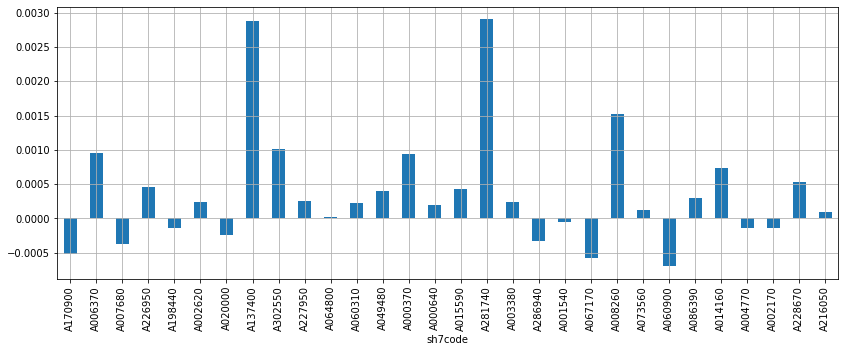

In [5]:
close_30_rtn_1d = close_30.pct_change(1, axis=0)
close_30_rtn_1d.mean(axis=0).plot(kind='bar', figsize=(14,5), grid=True);

### Backtest (look ahead)

매월 첫 거래일 종가 리밸런싱

In [6]:
start_date = '2020-01-01'
end_date = '2023-01-02'

mc_30_2022 = mc_30.loc[start_date:end_date,:]
close_30_rtn_1d_2022 = close_30_rtn_1d.loc[start_date:end_date,:]

first_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
rebal_dates = [ mc_30_2022.loc[fd:,:].iloc[0,:].name for fd in first_dates]

In [7]:
from scipy.optimize import minimize


def equal_weight(buy_basket_rtn_1d):
    stock_cnt = buy_basket_rtn_1d.shape[1]
    weights = np.ones(stock_cnt) / stock_cnt
    return weights


def value_weight(buy_basket_rtn_1d):
    stock_cnt = buy_basket_rtn_1d.shape[1]
    _date = buy_basket_rtn_1d.index[0]
    base_mc = mc_30_2022.loc[_date,:]
    value_weights = base_mc / base_mc.sum()
    return value_weights.values


def mvo_weight(buy_basket_rtn_1d):
    date_cnt = buy_basket_rtn_1d.shape[0]
    stock_cnt = buy_basket_rtn_1d.shape[1]
    
    monthly_rtn = buy_basket_rtn_1d.mean(axis=0) * date_cnt
    monthly_cov = buy_basket_rtn_1d.cov() * date_cnt
    
    initl_weights = np.ones(stock_cnt) / stock_cnt
    bounds = [(-1, 1)] * stock_cnt
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    result = minimize(
        lambda w: -(monthly_rtn@w)/(w.T@monthly_cov@w),
        initl_weights,
        bounds=bounds,
        constraints=constraints
    )
    return result.x

In [8]:
def portfolio_optimization_backtest(weights_func, close_30_rtn_1d, forward=False):
    daily_rtn = pd.Series(dtype = np.float64).reindex_like(close_30_rtn_1d.iloc[:,0])
    finish = rebal_dates[-1].strftime('%Y-%m-%d')
    for rd_idx in range(len(rebal_dates)-1):
        buy_date = rebal_dates[rd_idx]
        sell_date = rebal_dates[rd_idx+1]
        
        buy_basket_rtn_1d = close_30_rtn_1d.loc[buy_date:sell_date,:].iloc[1:]
        if forward:
            sample_period_rtn_1d = close_30_rtn_1d.loc[:buy_date,:].iloc[-740:-2]
            weights = weights_func(sample_period_rtn_1d)
        else:
            weights = weights_func(buy_basket_rtn_1d)
        period_rtn_1d = buy_basket_rtn_1d.values @ weights
        
        daily_rtn.loc[buy_date:sell_date].iloc[1:] = period_rtn_1d.reshape(-1)
        print(f"{sell_date.strftime('%Y-%m-%d')} / {finish}", end='\r')
    daily_rtn.dropna(inplace=True)
    return daily_rtn


def rtn_analysis(daily_rtn):
    cumprod_rtn = (daily_rtn + 1).cumprod()
    cumprod_high = cumprod_rtn.cummax()
    
    annual_rtn = daily_rtn.mean() * 252
    annual_std = daily_rtn.std() * np.sqrt(252)
    sharpe = annual_rtn / annual_std
    dd = cumprod_rtn / cumprod_high - 1
    
    print(f'Annualized mean return       : {annual_rtn:.4f}')
    print(f'Annualized standard deviation: {annual_std:.4f}')
    print(f'Sharpe ratio                 : {sharpe:.4f}')
    print(f'Maximum DrawDown             : {dd.min():.4f}')

- equal -
Annualized mean return       : 0.1030
Annualized standard deviation: 0.2795
Sharpe ratio                 : 0.3685
Maximum DrawDown             : -0.4582

- value -
Annualized mean return       : 0.0328
Annualized standard deviation: 0.2732
Sharpe ratio                 : 0.1202
Maximum DrawDown             : -0.4609

- mvo -
Annualized mean return       : 7.0716
Annualized standard deviation: 0.2360
Sharpe ratio                 : 29.9699
Maximum DrawDown             : 0.0000



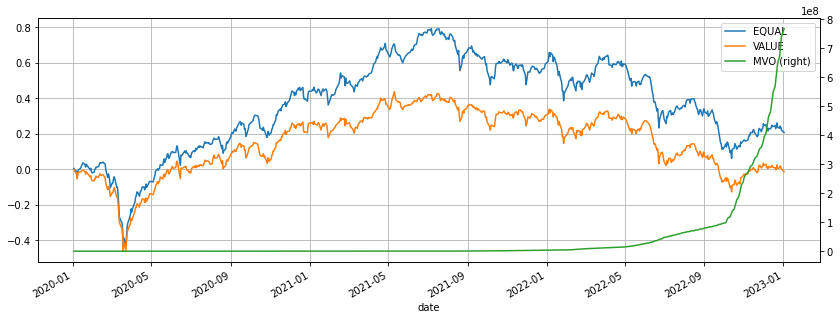

In [9]:
opt_models = {
    'equal':equal_weight,
    'value':value_weight,
    'mvo':mvo_weight
}
model_rtn_df = pd.DataFrame(index=close_30_rtn_1d_2022.index, columns = opt_models.keys())
for model in opt_models:
    print(f'- {model} -')
    model_rtn_df.loc[:,model] = portfolio_optimization_backtest(opt_models[model], close_30_rtn_1d_2022)
    rtn_analysis(model_rtn_df.loc[:,model])
    cum_rtn = (model_rtn_df.loc[:,model] + 1).cumprod() - 1
    if model=='mvo':
        cum_rtn.plot(label=model.upper(), legend = True, grid=True, secondary_y=True);  
    else:
        cum_rtn.plot(figsize=(14,5), label = model.upper(), legend = True, grid=True);
    print()

---

**(b)** Compare the performance of 3 portfolios in 2023 (for testing period) in terms of  
annualized mean return, annualized return standard deviation, Sharpe ratio, and maximum drawdown

### Backtest (forward)

In [10]:
start_date = '2023-01-01'
end_date = '2023-10-04'
mc_30_2023 = mc_30.loc[start_date:end_date,:]
close_30_rtn_1d_2023 = close_30_rtn_1d.loc[start_date:end_date,:]

first_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
rebal_dates = [ mc_30_2023.loc[fd:,:].iloc[0,:].name for fd in first_dates]

- equal -
Annualized mean return       : 0.0607
Annualized standard deviation: 0.1857
Sharpe ratio                 : 0.3272
Maximum DrawDown             : -0.1780

- value -
Annualized mean return       : -0.0047
Annualized standard deviation: 0.1865
Sharpe ratio                 : -0.0250
Maximum DrawDown             : -0.1764

- mvo -
Annualized mean return       : 0.0451
Annualized standard deviation: 0.2547
Sharpe ratio                 : 0.1769
Maximum DrawDown             : -0.1855



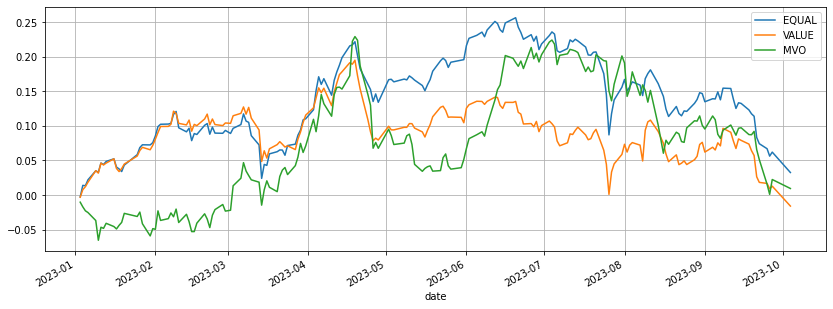

In [11]:
opt_models = {
    'equal':equal_weight,
    'value':value_weight,
    'mvo':mvo_weight
}
test_rtn_df = pd.DataFrame(index=close_30_rtn_1d_2023.index, columns = opt_models.keys())
for model in opt_models:
    print(f'- {model} -')
    test_rtn_df.loc[:,model] = portfolio_optimization_backtest(opt_models[model], close_30_rtn_1d, forward=True)
    rtn_analysis(test_rtn_df.loc[:,model])
    cum_rtn = (test_rtn_df.loc[:,model] + 1).cumprod() - 1
    cum_rtn.plot(figsize=(14,5), label = model.upper(), legend = True, grid=True);
    print()

---

## Problem 2. 

---

**(a)** Does the three portfolio works as expected in testing period too?  
(additional) Does the return distribution of portfolios in testing period are equal to the return distribution of portfolios in the sample period?  
How can we test it? If possible, test it and report the result.

예상대로 작동하지 않는다.  

Kolmogorov–Smirnov Test: not equal


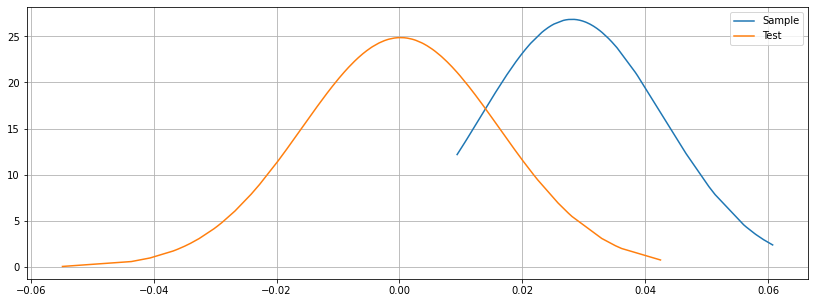

In [12]:
from scipy.stats import ks_2samp
from scipy.stats import norm

pvalue = ks_2samp(model_rtn_df['mvo'], test_rtn_df['mvo'])[1]
alpha = 0.01
print(f"Kolmogorov–Smirnov Test: {'equal' if pvalue > alpha else 'not equal'}")

sort_sample = model_rtn_df['mvo'].sort_values(ascending=True)
sort_test = test_rtn_df['mvo'].sort_values(ascending=True)

plt.figure(figsize=(14,5));
plt.grid();
plt.plot(sort_sample, norm.pdf(sort_sample, loc=sort_sample.mean(), scale=sort_sample.std()), label='Sample');
plt.plot(sort_test, norm.pdf(sort_test, loc=sort_test.mean(), scale=sort_test.std()), label='Test');
plt.legend();

---

**(b)** Followed by (a) if the portfolio does not work as expected, why? How can we fix the problem?

과거 데이터로부터의 파라미터 예측은 평균은 물론이고 공분산 행렬마저 상당히 잘못 추정될 수 있다.  

특히, fat tail 분포의 경우, 공분산 행렬 추정은 더욱 어려워진다.  

이를 보완하기 위한  Black-Litterman Model, Statistical Shrinkage 등의 방법론이 있다.

---